<a href="https://colab.research.google.com/github/esferita006/Codigos_de_varias_materias/blob/main/Ejercicios_de_analisis_numerico_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color="Teal" face="Comic Sans MS,arial">
  <h1 align="center"><i>EJERCICIOS DE ANALISIS NUMERICO</i></h1>
</font>

<font color="Black" face="Comic Sans MS,arial">
  <h5 align="center"><i>Acontinuacon se presentan algunos ejercicios de analisis numerico </i></h5>
</font>

## **Interpolación**

# **Ejercicio 1**
Dado un conjunto de puntos $S = \lbrace \left( x_i,y_i\right):i=0,1,2...,n \rbrace$, con $x_i\neq x_j$ para todo $i\neq j$; escribe un programa, que basado en el método de la matriz de Vandermonde, calcule los coeficientes $a_k$ del polinomio de grado $n$:

$$ P(x) = \overset{n}{\underset{k=0}{\sum}}a_k x^k$$

que pasa por cada punto de $S$. Y después escribe una rutina que pueda evaluar cualquier número real en la función $P(x)$ y que grafique a $P(x)$ en el intervalo $[x_0,x_n]$.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math

Pruebas para el primer conjuntos S de coordenadas
Ingresa el valor de x para la coordena 0: -1
Ingresa el valor de x para la coordena 1: 0
Ingresa el valor de x para la coordena 2: 1
Ingresa el valor de y para la coordena 0: 144
Ingresa el valor de y para la coordena 1: 49
Ingresa el valor de y para la coordena 2: 4
Los coeficientes del Polinomio son: 
[ 49. -70.  25.]


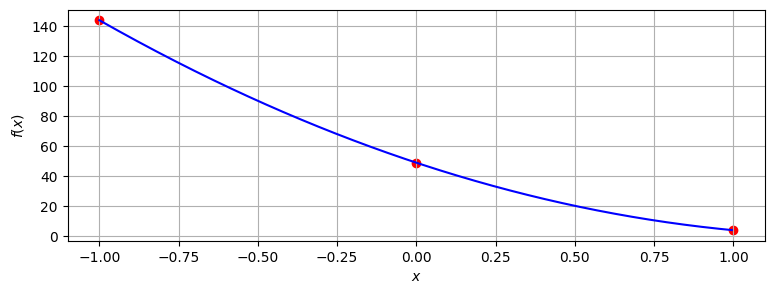

------------------------------------------------
Pruebas para el segundo conjunto S de coordenadas
Ingresa el valor de x para la coordena 0: -1
Ingresa el valor de x para la coordena 1: 0
Ingresa el valor de x para la coordena 2: 1
Ingresa el valor de x para la coordena 3: 2
Ingresa el valor de y para la coordena 0: 143
Ingresa el valor de y para la coordena 1: 49
Ingresa el valor de y para la coordena 2: 5
Ingresa el valor de y para la coordena 3: 17
Los coeficientes del Polinomio son: 
[ 49. -70.  25.   1.]


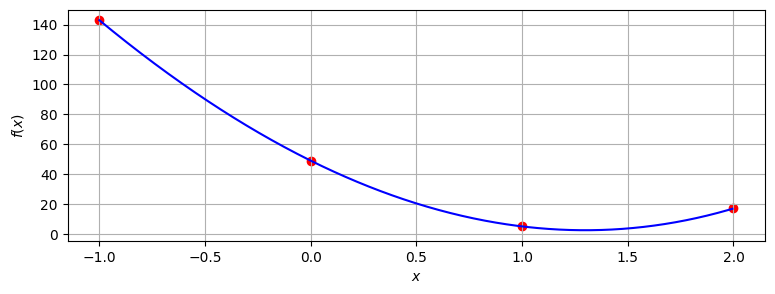

In [ ]:
'''
Se programó una función que que toma como inputs dos listas, en la primera están las entradas x de las coordenadas y
en la otra lista las entradas y. Después mandamos a llamar a la función vander de numpy para creal la matriz de vandermonde
y después resolvemos el sistema. la función te regresa los coeficientes del polinomio
'''
def ObtenerCoeficientes(listax, listay):
    matriz_vandermonde = np.vander(listax,  increasing = True)

    #Resolvemos el sistema
    sol = np.linalg.solve(matriz_vandermonde, listay)
    return sol
'''Pruebas'''
print('Pruebas para el primer conjuntos S de coordenadas')
n = 3
datosx= [int(input('Ingresa el valor de x para la coordena ' + str(i) + ': '))  for i in range(n)]
datosy= [int(input('Ingresa el valor de y para la coordena ' + str(i) + ': '))  for i in range(n)]

a_k=ObtenerCoeficientes(datosx, datosy)
print('Los coeficientes del Polinomio son: ')
print(a_k)
#Creamos una función a partir de los coeficientes obtenidos
def PolinomioTest1(u):
    return a_k[0]*math.pow(u,0) + a_k[1]*math.pow(u, 1) + a_k[2]*math.pow(u,2)
#Graficación
values_x = np.arange(min(datosx), max(datosx), 0.005)
values_y = [PolinomioTest1(k) for k in values_x]


plt.figure(figsize=(9, 3))
plt.plot(values_x, values_y, color = 'blue')
plt.scatter(datosx, datosy, color = 'red')
plt.grid(True)
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.show()
print('------------------------------------------------')
print('Pruebas para el segundo conjunto S de coordenadas')

n = 4
datosx= [int(input('Ingresa el valor de x para la coordena ' + str(i) + ': '))  for i in range(n)]
datosy= [int(input('Ingresa el valor de y para la coordena ' + str(i) + ': '))  for i in range(n)]

a_k=ObtenerCoeficientes(datosx, datosy)
print('Los coeficientes del Polinomio son: ')
print(a_k)
#Creamos una función a partir de los coeficientes obtenidos
def PolinomioTest2(u):
    return a_k[0]*math.pow(u,0) + a_k[1]*math.pow(u, 1) + a_k[2]*math.pow(u,2) + a_k[3]*math.pow(u,3)
#Graficación
values_x = np.arange(min(datosx), max(datosx), 0.005)
values_y = [PolinomioTest2(k) for k in values_x]


plt.figure(figsize=(9, 3))
plt.plot(values_x, values_y, color = 'blue')
plt.scatter(datosx, datosy, color = 'red')
plt.grid(True)
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.show()

Prueba tu programa encontrando el polinomio de grado 2 que pasa por los puntos del conjunto
$$
S=\lbrace (-1,144),(0,49),(1,4)\rbrace ,$$

y el polinomio de grado 3 que pasa por los puntos de
$$
S=\lbrace (-1,143),(0,49),(1,5),(2,17)\rbrace
$$
Escribe los polinomios encontrados.

El primer polinomio obtenido por el primer conjuntos $S$ es:
$$P(x) = 49 -70x + 25x^{2}   $$
El polinomio para el segundo conjunto $S$ de puntos es:
$$P(x) = 49 - 70x + 25x^{2} + x^{3}                      $$

# **Ejercicio 2**
Escribe un programa que encuentre el polinomio interpolante de Newton para un conjunto de puntos $S = \lbrace \left( x_i,y_i\right):i=0,1,2...,n \rbrace$. Además, este programa debe arrojar un valor $P(x)$ para cualquier valor $x$ introducido y grafica a $P(x)$ en el intervalo $[x_0,x_n]$.

Sean los siguientes datos
$$
\begin{array}{|c|c|c|c|c|c|c|c|c|c|c|c|c|}
x & 0.0 & 0.314 & 0.628 & 0.942 & 1.256 & 1.570 & 1.884 & 2.198 & 2.512 & 2.826 & 3.140 & 3.454 & 3.768 & 4.082 & 4.396\\
f(x) & 0.0 & 0.308 & 0.587 & 0.808 & 0.950 & 0.999 & 0.951 & 0.809 & 0.588 & 0.310 & 0.001 & -0.307 & -0.586 & -0.807 & -0.95
\end{array}
$$

Encuentra el polinomio de Newton que interpola los datos de la tabla anterior y gráficalo. Escribe lo que observas.

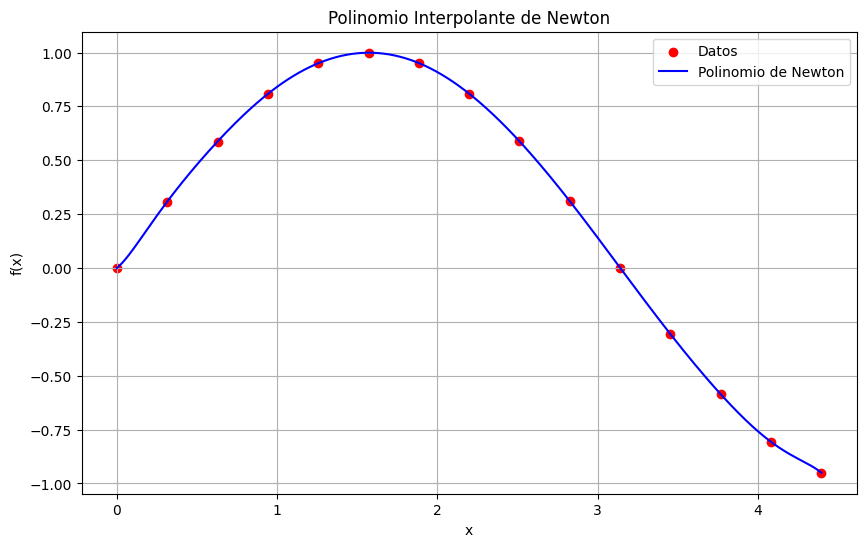

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Datos de entrada
x_values = np.array([0.0, 0.314, 0.628, 0.942, 1.256, 1.570, 1.884, 2.198, 2.512, 2.826, 3.140, 3.454, 3.768, 4.082, 4.396])
y_values = np.array([0.0, 0.308, 0.587, 0.808, 0.950, 0.999, 0.951, 0.809, 0.588, 0.310, 0.001, -0.307, -0.586, -0.807, -0.95])

# Calcula las diferencias divididas de Newton
def divided_differences(x, y):
    n = len(x)
    table = np.zeros((n, n))
    table[:, 0] = y

    for j in range(1, n):
        for i in range(n - j):
            table[i][j] = (table[i + 1][j - 1] - table[i][j - 1]) / (x[i + j] - x[i])

    return table[0]

coefficients = divided_differences(x_values, y_values)

# Construye el polinomio de Newton
def newton_interpolation(x, x_values, coefficients):
    n = len(x_values)
    result = coefficients[0]
    term = 1

    for i in range(1, n):
        term *= (x - x_values[i - 1])
        result += coefficients[i] * term

    return result

# Valores en el intervalo [x_0, x_n]
x_interval = np.linspace(0, 4.396, 400)
y_interpolated = [newton_interpolation(x, x_values, coefficients) for x in x_interval]

# Grafica el polinomio interpolante
plt.figure(figsize=(10, 6))
plt.scatter(x_values, y_values, label='Datos', color='red')
plt.plot(x_interval, y_interpolated, label='Polinomio de Newton', color='blue')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.title('Polinomio Interpolante de Newton')
plt.grid(True)
plt.show()


# **Ejercicio 3**
Escribe un programa que encuentre el polinomio interpolante de Lagrange para un conjunto de puntos $S = \lbrace \left( x_i,y_i\right):i=0,1,2...,n \rbrace$. Además, este programa debe devolver un valor $P(x)$ para cualquier valor $x$ introducido y graficar a $P(x)$ en el intervalo $[x_0,x_n]$.

La presión de vapor del agua (en unidades $[bar]$) como función de la temperatura $T(°C)$ es:
$$
\begin{array}{|c|c|c|c|c|c|c|c|c|}
T & 0 & 10 & 20 & 30 & 40 & 60 & 80 & 100 \\
P & 0.0061 & 0.0123 & 0.0234 & 0.0424 & 0.0738 & 0.1992 & 0.4736 & 1.0133
\end{array}$$

Calcula mediante el programa anterior el polinomio que interpola los datos y por medio del polinomio encontrado estima el valor de $P(5)$, $P(45)$ y $P(95)$

Compara tus resultados con los valores conocidos de la presión: $P(5) = 0.008721$, $P(45) = 0.095848$ y $P(95) = 0.84528$. Calcula el error absoluto de los valores otenidos a través del polinomio interpolante. ¿El polinomio interpolante describe bien la presión de vapor como función de la temperatura?


In [ ]:
import numpy as np

# Datos de entrada
T = np.array([0, 10, 20, 30, 40, 60, 80, 100])
P = np.array([0.0061, 0.0123, 0.0234, 0.0424, 0.0738, 0.1992, 0.4736, 1.0133])

# Función para calcular el polinomio interpolante de Lagrange
def lagrange_interpolation(x, T, P):
    n = len(T)
    result = 0.0

    for i in range(n):
        term = P[i]
        for j in range(n):
            if j != i:
                term *= (x - T[j]) / (T[i] - T[j])
        result += term

    return result

# Valores a estimar
T_estimation = [5, 45, 95]

# Estimar P(x) para los valores dados
P_estimated = [lagrange_interpolation(x, T, P) for x in T_estimation]

# ESTOS SON LOS VALORES QUE NOS DA EL ENUNCIADO
P_known = [0.008721, 0.095848, 0.84528]

# Calcular el error absoluto
errors = [abs(P_known[i] - P_estimated[i]) for i in range(len(T_estimation))]

# Imprimir resultados
for i in range(len(T_estimation)):
    print(f'P({T_estimation[i]}) estimado: {P_estimated[i]}, P({T_estimation[i]}) conocido: {P_known[i]}, Error absoluto: {errors[i]}')



P(5) estimado: 0.00869104207356771, P(5) conocido: 0.008721, Error absoluto: 2.9957926432289117e-05
P(45) estimado: 0.09591859741210938, P(45) conocido: 0.095848, Error absoluto: 7.059741210937998e-05
P(95) estimado: 0.8461727925618493, P(95) conocido: 0.84528, Error absoluto: 0.0008927925618492649


# **Ejercicio 4**
Escribe un programa que calcule un spline cuadratico $Q(x)$ que interpole un conjunto de datos $S = \lbrace \left( x_i,y_i\right):i=1,2...,n \rbrace$. Además, este programa debe devolver un valor $Q(x)$ para cualquier valor $x$ introducido y graficar $Q(x)$ en el intervalo $[x_0,x_n]$.

Dados los siguientes valores de una función:
$$\begin{array}{|c|c|c|c|c|}
 x &  -1 & 0 & 1 & 2 \\
p(x) & -4 & -1 & 2 & 23
\end{array}$$

Calcula mediante el programa anterior el spline cuadratico $Q(x)$ que interpola los datos y también calcula $Q(1.5)$.

Q(1.5) = 9.875


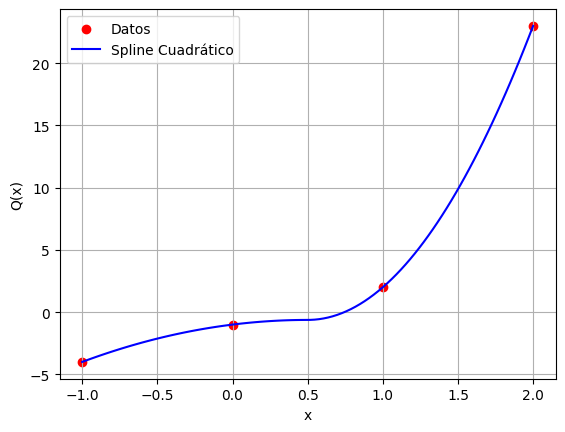

In [ ]:
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

# Datos de entrada
x_data = np.array([-1, 0, 1, 2])
y_data = np.array([-4, -1, 2, 23])

# Interpolación cuadrática
spline = interp1d(x_data, y_data, kind='quadratic')

# Valor de Q(1.5)
x_interp = 1.5
q_1_5 = spline(x_interp)

# Crear una serie de puntos para graficar el spline en el intervalo [x_0, x_n]
x_plot = np.linspace(x_data[0], x_data[-1], 100)
y_plot = spline(x_plot)

# Imprimir Q(1.5)
print(f"Q(1.5) = {q_1_5}")

# Graficar el spline
plt.scatter(x_data, y_data, label='Datos', color='red')
plt.plot(x_plot, y_plot, label='Spline Cuadrático', color='blue')
plt.xlabel('x')
plt.ylabel('Q(x)')
plt.legend()
plt.grid()
plt.show()


# **Ejercicio 5**
En un experimento se produjeron los siguientes datos:

$$\begin{array}{|c|c|c|c|c|cc||}
t & 0.0 & 0.5 & 1.0 & 6.0 & 7.0 & 9.0 \\
y & 0.0 & 1.6 & 2.0 & 2.0 & 1.5 & 0.0
\end{array}$$

Se desea interpolar los datos con una curva suave con la esperanza de obtener valores razonables de $y$ para valores de $t$ entre los puntos en los que se hicieron las medidas

a) Escribe un programa que utilice el método de tu preferencia para determinar el polinomio de grado cinco que interpole los datos y que grafique en el rango $0\leq t \leq 9$.

b) Haz un programa que determine un spline cúbico natural que interpole los datos dados y que grafique en el intervalo $0\leq t \leq 9$.

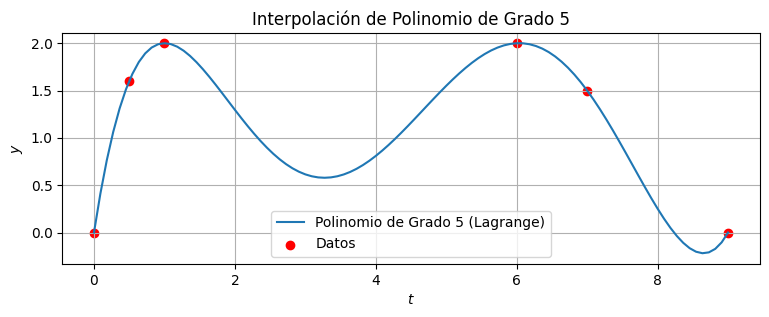

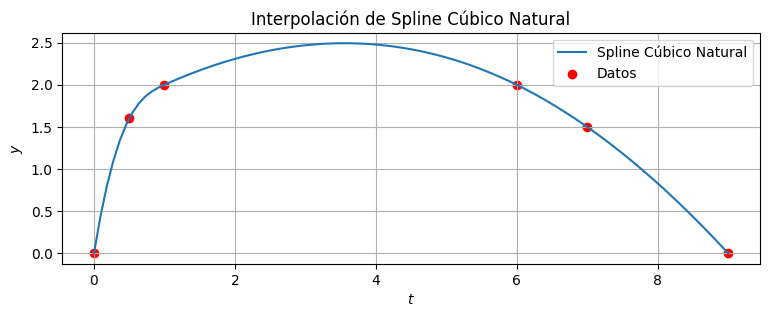

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# Datos proporcionados
valores_t = np.array([0.0, 0.5, 1.0, 6.0, 7.0, 9.0])
valores_y = np.array([0.0, 1.6, 2.0, 2.0, 1.5, 0.0])

# a) Interpolación de Lagrange
polinomio_interpolante = np.poly1d(np.polyfit(valores_t, valores_y, 5))

t_range = np.linspace(0, 9, 100)
y_range = polinomio_interpolante(t_range)

plt.figure(figsize=(9, 3))
plt.plot(t_range, y_range, label='Polinomio de Grado 5 (Lagrange)')
plt.scatter(valores_t, valores_y, c='red', marker='o', label='Datos')
plt.grid(True)
plt.xlabel('$t$')
plt.ylabel('$y$')
plt.title('Interpolación de Polinomio de Grado 5')
plt.legend()
plt.show()

# b) Interpolación de Spline Cúbico Natural
spline_interpolante = interp1d(valores_t, valores_y, kind='cubic')

t_range = np.linspace(0, 9, 100)
y_range = spline_interpolante(t_range)

plt.figure(figsize=(9, 3))
plt.plot(t_range, y_range, label='Spline Cúbico Natural')
plt.scatter(valores_t, valores_y, c='red', marker='o', label='Datos')
plt.grid(True)
plt.xlabel('$t$')
plt.ylabel('$y$')
plt.title('Interpolación de Spline Cúbico Natural')
plt.legend()
plt.show()


## Interpolación Spline

## Ejercicio 1

Elabora un programa que calcule el spline cúbico natural que interpola los siguientes datos:
$$\begin{array}{|c|c|c|c|c|cc||}
x & 2.0 & 2.1 & 2.2 & 2.3  \\
f(x) & 1.5 & 2.0 & 3.8 & 5.1  
\end{array}$$

Aproxima los valores de $f(2.05)$, $f(2.15)$ y $f(2.25)$. Finalmente escribe una rutina que grafique el Spline y los puntos
expuestos en la tabla anterior.

f(2.05) = 1.6074999999999993
f(2.15) = 2.839999999999995
f(2.25) = 4.532499999999999


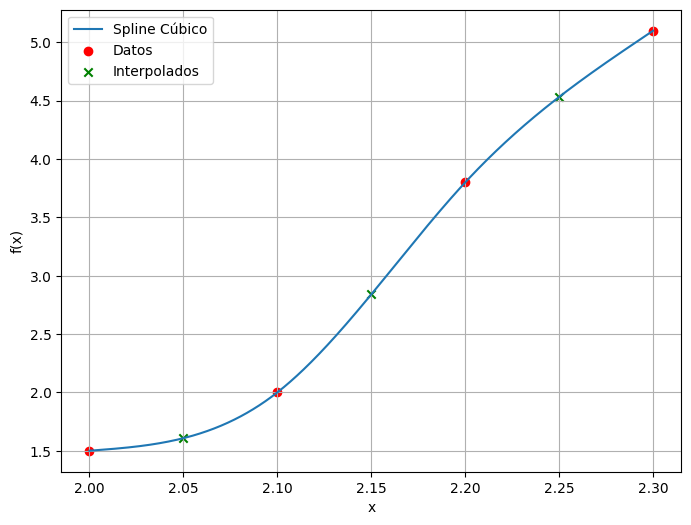

In [ ]:
import numpy as np
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt

# Datos proporcionados
x_data = np.array([2.0, 2.1, 2.2, 2.3])
y_data = np.array([1.5, 2.0, 3.8, 5.1])

# Calcula el spline cúbico natural
spline = CubicSpline(x_data, y_data, bc_type='natural')

# Valores en los puntos de interés
x_interpolated = np.array([2.05, 2.15, 2.25])
y_interpolated = spline(x_interpolated)

# Imprime los valores interpolados
for x, y in zip(x_interpolated, y_interpolated):
    print(f'f({x}) = {y}')

# Grafica el spline y los puntos de datos
x_smooth = np.linspace(x_data[0], x_data[-1], 1000)
y_smooth = spline(x_smooth)

plt.figure(figsize=(8, 6))
plt.plot(x_smooth, y_smooth, label='Spline Cúbico')
plt.scatter(x_data, y_data, color='red', label='Datos', marker='o')
plt.scatter(x_interpolated, y_interpolated, color='green', label='Interpolados', marker='x')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid()
plt.show()


## **Integración numérica**

# **Ejercicio 2**
Escribe un programa que aproxime el valor de la integral

$$ \int_{-1}^{1} e^{-x^2}dx,$$

primero con la regla de Simpson 1/3, luego con la regla de Simpson 1/3 compuesta que considere $n$ subintervalos, donde $n$ es un entero positivo entre 2 y 1000 introducido por el usuario del programa. Utiliza un módulo de Python para calcular dicha integral y compara el resultado que obtuviste con tu programa.

In [ ]:
import numpy as np
from scipy.integrate import quad

# Función que se va a integrar
def integrand(x):
    return np.exp(-x**2)

# Regla de Simpson 1/3
def simpson_13(a, b, f_a, f_b, f_m):
    return (b - a) * (f_a + 4 * f_m + f_b) / 6

# Regla de Simpson 1/3 compuesta
def simpson_13_compound(a, b, n):
    if n % 2 == 0:  # Número par de subintervalos
        h = (b - a) / n
        x = np.linspace(a, b, n + 1)
        y = integrand(x)
        result = 0

        for i in range(0, n, 2):
            result += simpson_13(x[i], x[i+2], y[i], y[i+2], y[i+1])

        return result
    else:  # Número impar de subintervalos (manejo del último subintervalo con la regla del trapecio)
        h = (b - a) / n
        x = np.linspace(a, b, n + 1)
        y = integrand(x)
        result = 0

        for i in range(0, n - 2, 2):
            result += simpson_13(x[i], x[i+2], y[i], y[i+2], y[i+1])

        # Manejo del último subintervalo con la regla del trapecio
        result += (h / 2) * (y[n - 1] + y[n])

        return result

# Entrada del número de subintervalos
n = int(input("Ingrese el número de subintervalos: "))

a, b = -1, 1

# Cálculo de la integral utilizando quad de SciPy (valor exacto)
exact_integral, _ = quad(integrand, a, b)

# Cálculo de la integral con la regla de Simpson 1/3
simpson_13_result = simpson_13(a, b, integrand(a), integrand(b), integrand((a + b) / 2))

# Cálculo de la integral con la regla de Simpson 1/3 compuesta
simpson_13_compound_result = simpson_13_compound(a, b, n)

# Resultados
print(f"Valor exacto de la integral: {exact_integral}")
print(f"Aproximación con Simpson 1/3: {simpson_13_result}")
print(f"Aproximación con Simpson 1/3 compuesta ({n} subintervalos): {simpson_13_compound_result}")


Ingrese el número de subintervalos: 1
Valor exacto de la integral: 1.493648265624854
Aproximación con Simpson 1/3: 1.5785862941142952
Aproximación con Simpson 1/3 compuesta (1 subintervalos): 0.7357588823428847


# **Ejercicio 3**

La función logaritmo se define como

$$\log (x) = \int_1^x \frac{dt}{t}.$$

Escribe un programa que mediante una regla compuesta que puede ser de punto medio, de trapecio o de Simpson, y que considere $n = 10^4$ subintervalos, obtenga el valor de $\log(x)$ para cualquier número $x>0$.

*Divide el problema en tres casos: $x<1$, $x = 1$ y $x>1$*.

In [ ]:
import numpy as np

# Función que se va a integrar: 1/t
def integrand(t):
    return 1 / t

# Regla compuesta para el cálculo del logaritmo
def composite_rule(a, b, n, rule):
    h = (b - a) / n
    result = 0

    if rule == "midpoint":
        for i in range(n):
            x_i = a + (i + 0.5) * h
            result += integrand(x_i)

    elif rule == "trapezoid":
        for i in range(1, n):
            x_i = a + i * h
            result += integrand(x_i)

        result = 0.5 * (integrand(a) + 2 * result + integrand(b))

    elif rule == "simpson":
        result = integrand(a) + integrand(b)
        for i in range(1, n):
            x_i = a + i * h
            if i % 2 == 0:
                result += 2 * integrand(x_i)
            else:
                result += 4 * integrand(x_i)

        result = (h / 3) * result

    return result

# Valor de x
x = float(input("Ingrese el valor de x (x > 0): "))

if x < 1:
    result = -composite_rule(1, x, 10**4, "trapezoid")

elif x == 1:
    result = 0.0

else:
    result = composite_rule(1, x, 10**4, "trapezoid")

print(f"El valor de log({x}) es aproximadamente: {result:.6f}")


Ingrese el valor de x (x > 0): 1
El valor de log(1.0) es aproximadamente: 0.000000


Haz una rutina que genere una tabla que muestre el valor de $\log(x_j)$ para $x_j = 10^{-4+j}$, con $j = 0,1,2,...,20$; utilizando tu programa anterior. Al mismo tiempo, en la tabla se debe mostrar el valor de $\log(x_j)$ calculado por la función predeterminada de la máquina y el error absoluto al comparar lo calculado por tu programa y lo que calcula la función $\log(x)$ predeterminada.

In [ ]:
import numpy as np

# Función que se va a integrar: 1/t
def integrand(t):
    return 1 / t

# Regla compuesta para el cálculo del logaritmo
def composite_rule(a, b, n, rule):
    h = (b - a) / n
    result = 0

    if rule == "midpoint":
        for i in range(n):
            x_i = a + (i + 0.5) * h
            result += integrand(x_i)

    elif rule == "trapezoid":
        for i in range(1, n):
            x_i = a + i * h
            result += integrand(x_i)

        result = 0.5 * (integrand(a) + 2 * result + integrand(b))

    elif rule == "simpson":
        result = integrand(a) + integrand(b)
        for i in range(1, n):
            x_i = a + i * h
            if i % 2 == 0:
                result += 2 * integrand(x_i)
            else:
                result += 4 * integrand(x_i)

        result = (h / 3) * result

    return result

# Crear la tabla
table = []
for j in range(21):
    x = 10**(-4 + j)
    calculated_value = composite_rule(1, x, 10**4, "trapezoid")
    numpy_value = np.log(x)
    absolute_error = abs(calculated_value - numpy_value)
    table.append([x, calculated_value, numpy_value, absolute_error])

# Encabezado de la tabla
print("|{:<12}|{:<18}|{:<14}|{:<14}|".format("x_j", "Valor Calculado", "Valor Numpy", "Error Absoluto"))
print("|" + "-" * 58 + "|")

# Imprimir la tabla
for row in table:
    x, calculated, numpy, error = row
    print("|{:<12.8f}|{:<18.8f}|{:<14.8f}|{:<14.8f}|".format(x, calculated, numpy, error))


|x_j         |Valor Calculado   |Valor Numpy   |Error Absoluto|
|----------------------------------------------------------|
|0.00010000  |92884.70390248    |-9.21034037   |92893.91424285|
|0.00100000  |69155.01621171    |-6.90775528   |69161.92396698|
|0.01000000  |46516.95305648    |-4.60517019   |46521.55822666|
|0.10000000  |25584.27955354    |-2.30258509   |25586.58213864|
|1.00000000  |10000.00000000    |0.00000000    |10000.00000000|
|10.00000000 |2558.42795535     |2.30258509    |2556.12537026 |
|100.00000000|465.16953056      |4.60517019    |460.56436038  |
|1000.00000000|69.15501621       |6.90775528    |62.24726093   |
|10000.00000000|9.28847039        |9.21034037    |0.07813002    |
|100000.00000000|1.46342002        |11.51292546   |10.04950544   |
|1000000.00000000|0.59771237        |13.81551056   |13.21779819   |
|10000000.00000000|0.50978591        |16.11809565   |15.60830974   |
|100000000.00000000|0.50097874        |18.42068074   |17.91970200   |
|1000000000.00000000|0

> - <font color=blue> ¿Qué sucede para valores pequeños de $x$?.</font>
> - <font color=blue> ¿Qué sucede para valores grandes de $x$?.</font>
> - <font color=blue> Explica tus respuestas.</font>

# **Ejercicio 4**

El número $\pi$ puede aproximarse mediante la integral
$$
\pi = \int_{0}^{1}\frac{4}{1+x^2}dx.
$$

Elabora un programa que utilice el método de integración compuesta de tu preferencia para aproximar el valor de $\pi$ considerando $n$ subintervalos, donde $n>20$ y es un número introducido por el usuario. El programa también debe reportar el error en la aproximación tomando como valor real de $\pi$ el arrojado por python para precisión doble.

In [ ]:
import numpy as np
import math

# Función que se va a integrar: 4 / (1 + x^2)
def integrand(x):
    return 4 / (1 + x**2)

# Regla compuesta para el cálculo de pi
def composite_rule(a, b, n, rule):
    h = (b - a) / n
    result = 0

    if rule == "midpoint":
        for i in range(n):
            x_i = a + (i + 0.5) * h
            result += integrand(x_i)

    elif rule == "trapezoid":
        for i in range(1, n):
            x_i = a + i * h
            result += integrand(x_i)

        result = 0.5 * (integrand(a) + 2 * result + integrand(b))

    elif rule == "simpson":
        result = integrand(a) + integrand(b)
        for i in range(1, n):
            x_i = a + i * h
            if i % 2 == 0:
                result += 2 * integrand(x_i)
            else:
                result += 4 * integrand(x_i)

        result = (h / 3) * result

    return result

# Valor de pi con precisión doble
real_pi = np.pi

# Entrada del número de subintervalos
n = int(input("Ingrese el número de subintervalos (n > 20): "))

if n <= 20:
    print("El número de subintervalos debe ser mayor que 20.")
else:
    a, b = 0, 1

    # Cálculo de la integral utilizando el método de integración compuesta
    calculated_pi = composite_rule(a, b, n, "trapezoid")

    # Cálculo del error absoluto
    error = abs(calculated_pi - real_pi)

    print(f"Valor aproximado de pi: {calculated_pi:.10f}")
    print(f"Valor real de pi (precisión doble): {real_pi:.10f}")
    print(f"Error absoluto: {error:.10f}")


Ingrese el número de subintervalos (n > 20): 21
Valor aproximado de pi: 65.9655092179
Valor real de pi (precisión doble): 3.1415926536
Error absoluto: 62.8239165643
